In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('mobile_specs_engineered.csv')

In [7]:
sns.set(style='whitegrid', palette='Set2', font_scale=1.1)

## Q 1) Which features are strongly correlated with price, spec score, or performance?
- Identify which features (e.g., RAM, battery, processor tier) drive the most impact on other variables like price, Value_score, or Performance_Score.

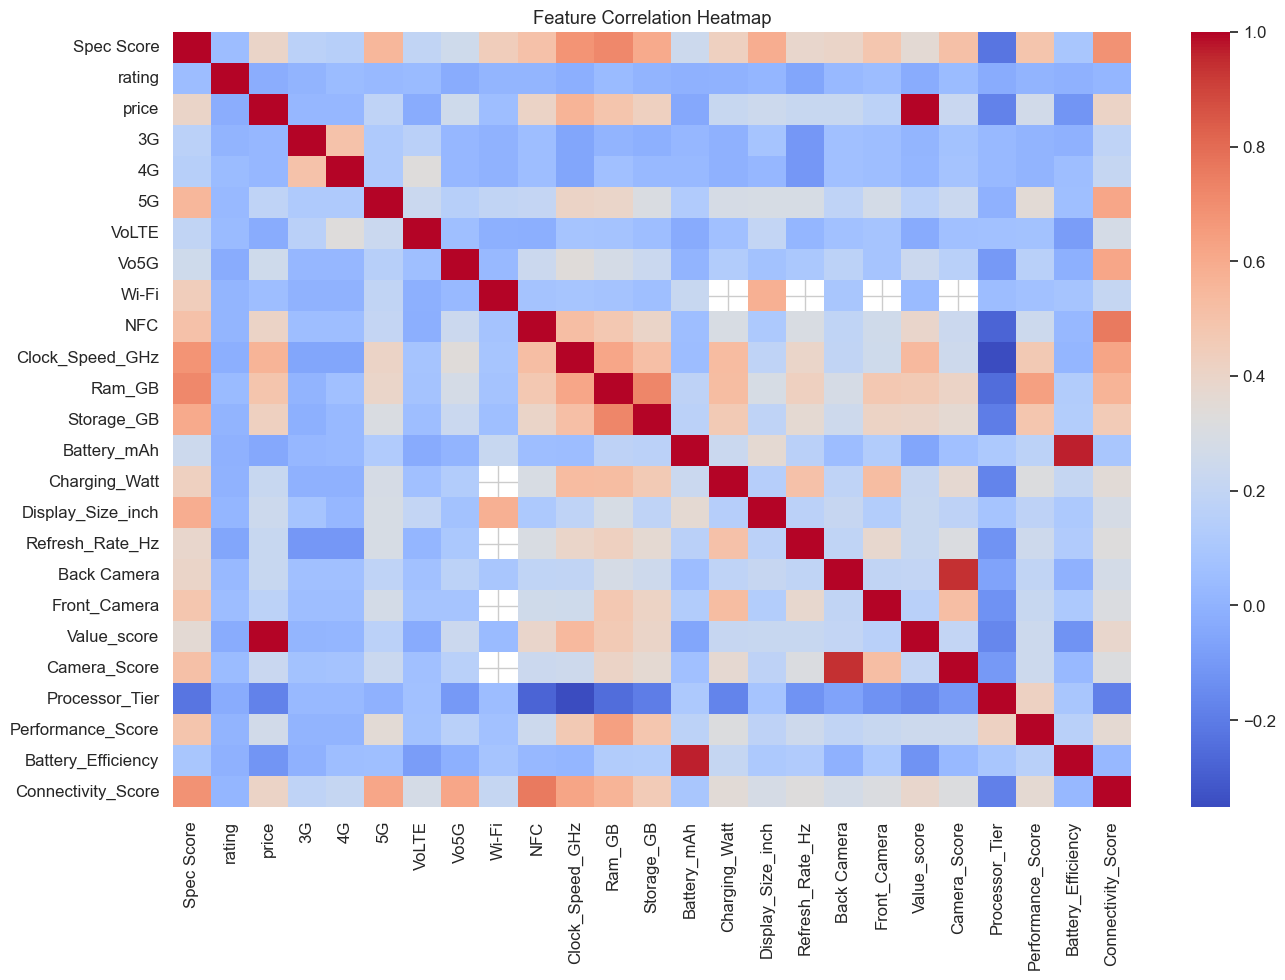

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()

#### - From above heatmap we can conclude that:
#### - (price and value score), (Battery_mAh and Battery_Efficinecy), (Back Camera and Camera Score) are corellated

## Q 2) Do higher spec scores always mean higher prices? Are there outliers (undervalued or overpriced phones)?
- Understand the price-to-performance relationship and spot good value or overpriced devices.

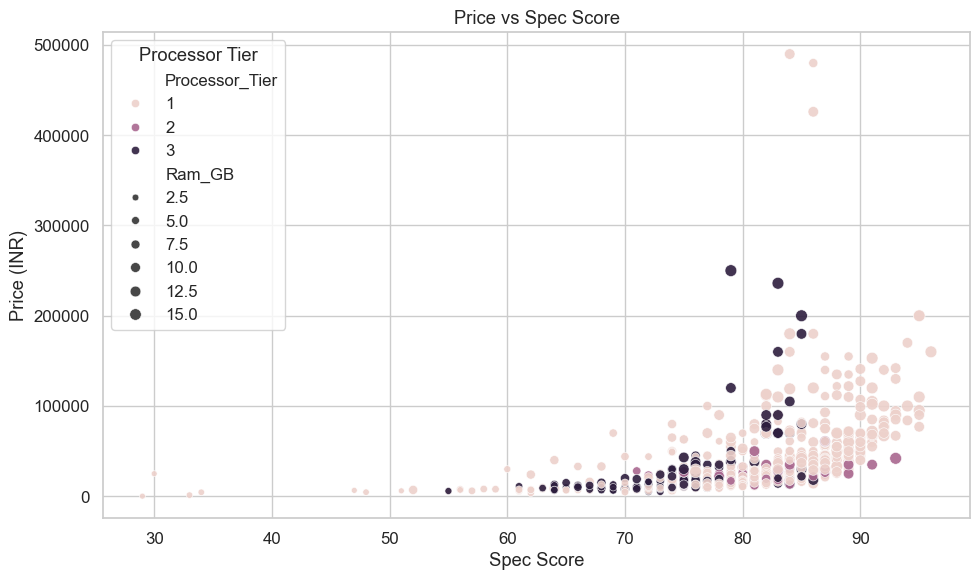

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Spec Score', y='price', hue='Processor_Tier', size='Ram_GB', alpha=0.9)
plt.title('Price vs Spec Score')
plt.xlabel('Spec Score')
plt.ylabel('Price (INR)')
plt.legend(title='Processor Tier')
plt.tight_layout()
plt.show()

#### - A phone with high spec score but low price (bottom-right corner) → great value.
#### - Most phones with Snapdragon 8 Gen3 or Dimensity 9200 Plus are clustered in the premium segment (₹50K+), validating flagship pricing.
#### - There are a few models with high spec scores but surprisingly low prices — ideal for value-focused customers.
#### - Some mid-tier processors like Dimensity 7050 are priced close to high-end models, indicating weaker price-to-performance balance.

## Q 3) How does Android and iOS version affect phone pricing?

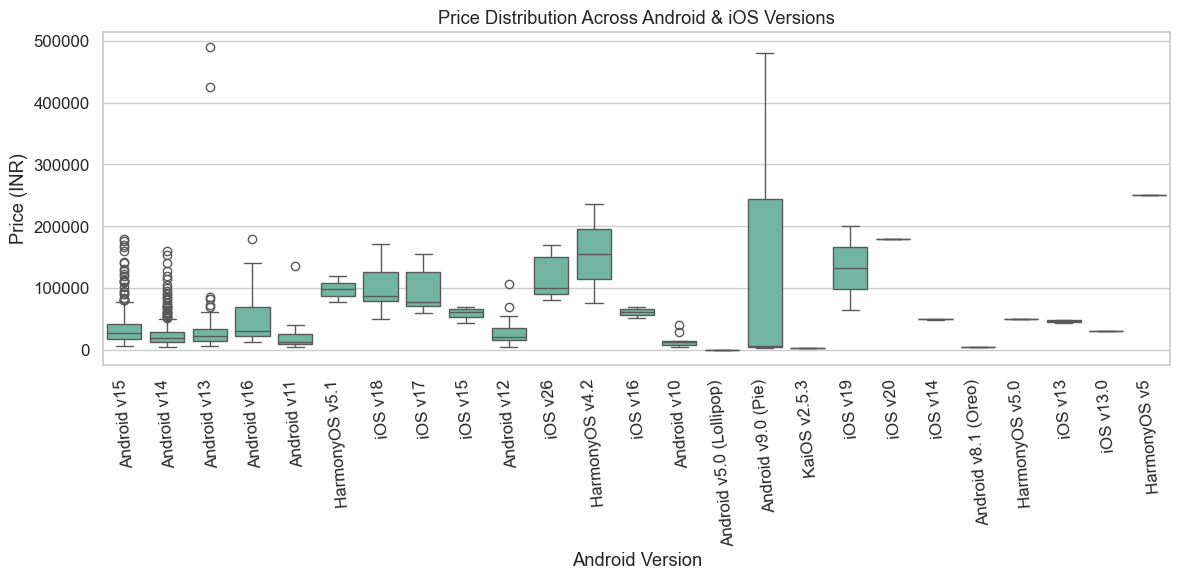

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='version', y='price')
plt.title("Price Distribution Across Android & iOS Versions")
plt.xlabel("Android Version")
plt.ylabel("Price (INR)")
plt.xticks(rotation=95)
plt.tight_layout()

## Q 4) Which phones offer the best value?

C:\Users\Naik Siddhesh\AppData\Local\Temp\ipykernel_14236\159394489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Value_score', y='Name', palette='viridis')


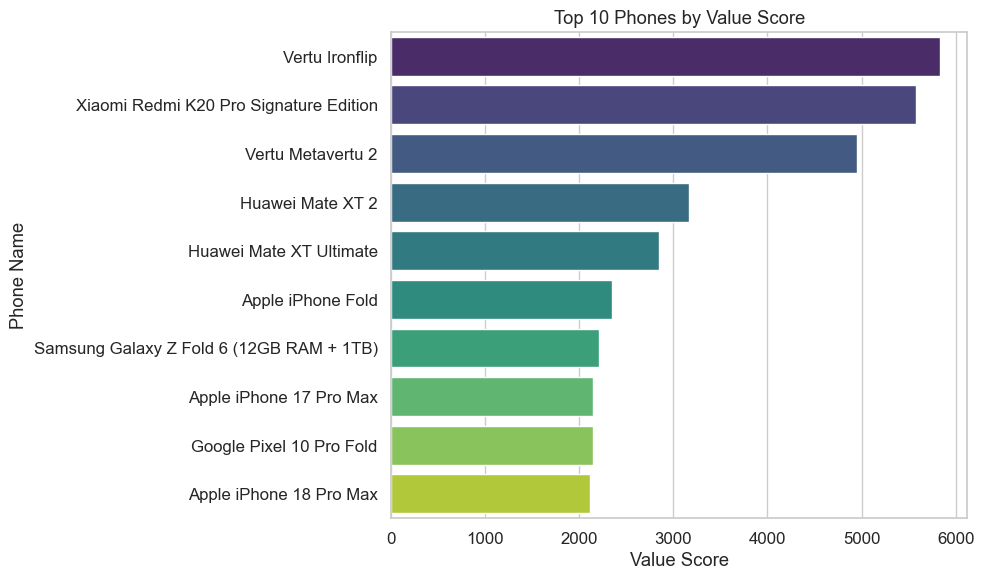

In [19]:
top_10 = df.nlargest(10, 'Value_score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Value_score', y='Name', palette='viridis')
plt.title('Top 10 Phones by Value Score')
plt.xlabel('Value Score')
plt.ylabel('Phone Name')
plt.tight_layout()
plt.show()

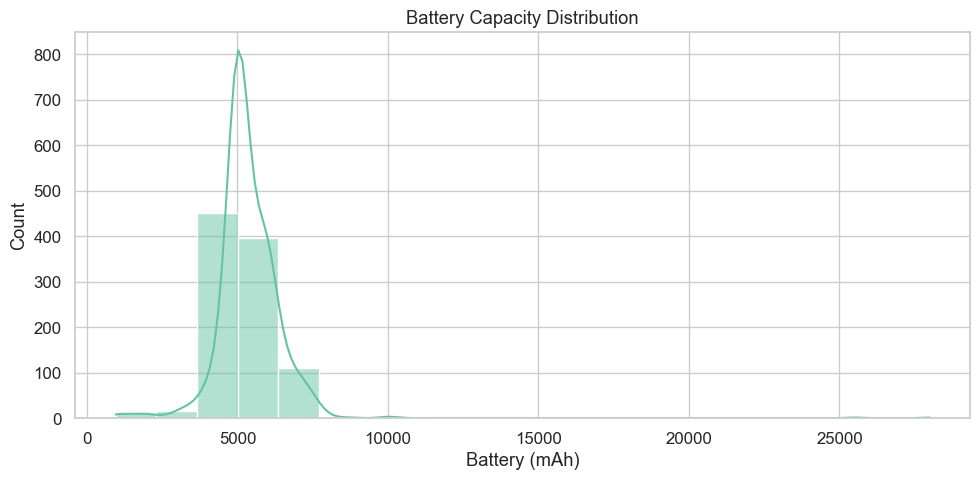

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Battery_mAh'], kde=True, bins=20)
plt.title("Battery Capacity Distribution")
plt.xlabel("Battery (mAh)")
plt.tight_layout()
plt.show()